   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/150.0 MB 21.1 MB/s eta 0:00:08
   -- ------------------------------------- 7.6/150.0 MB 26.1 MB/s eta 0:00:06
   -- ------------------------------------- 11.0/150.0 MB 22.9 MB/s eta 0:00:07
   ---- ----------------------------------- 15.5/150.0 MB 22.1 MB/s eta 0:00:07
   ----- ---------------------------------- 19.7/150.0 MB 21.4 MB/s eta 0:00:07
   ------ --------------------------------- 23.6/150.0 MB 21.0 MB/s eta 0:00:07
   ------- -------------------------------- 27.8/150.0 MB 20.7 MB/s eta 0:00:06
   -------- ------------------------------- 32.0/150.0 MB 20.7 MB/s eta 0:00:06
   --------- ------------------------------ 35.9/150.0 MB 20.4 MB/s eta 0:00:06
   ---------- ----------------------------- 40.1/150.0 MB 20.4 MB/s eta 0:00:06
   ----------- ---------------------------- 44.3/150.0 MB 20.3 MB/s eta 0:00:06
   ------------ --------------------------- 48.2/15

C:\Users\HP\AppData\Local\Temp\ipykernel_9980\3753531810.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=combined_df, x='Muhurtham Day', y='quantity', estimator=np.mean, ci=None)


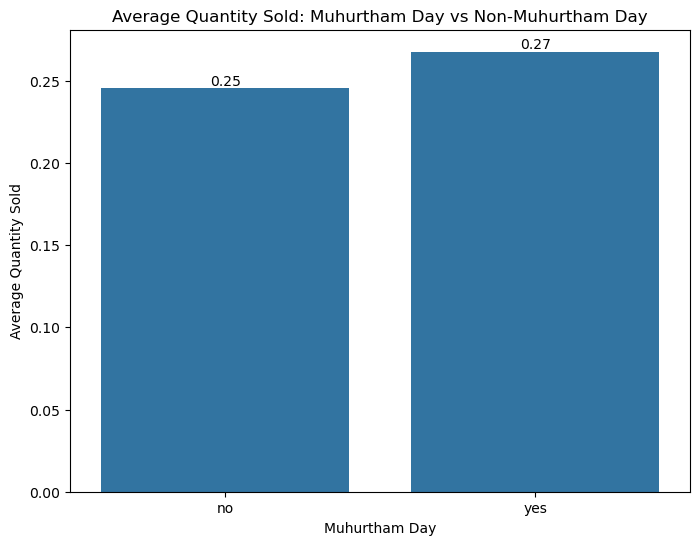

C:\Users\HP\AppData\Local\Temp\ipykernel_9980\3753531810.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df, x='DayOfWeek', y='quantity', estimator=sum, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ci=None)


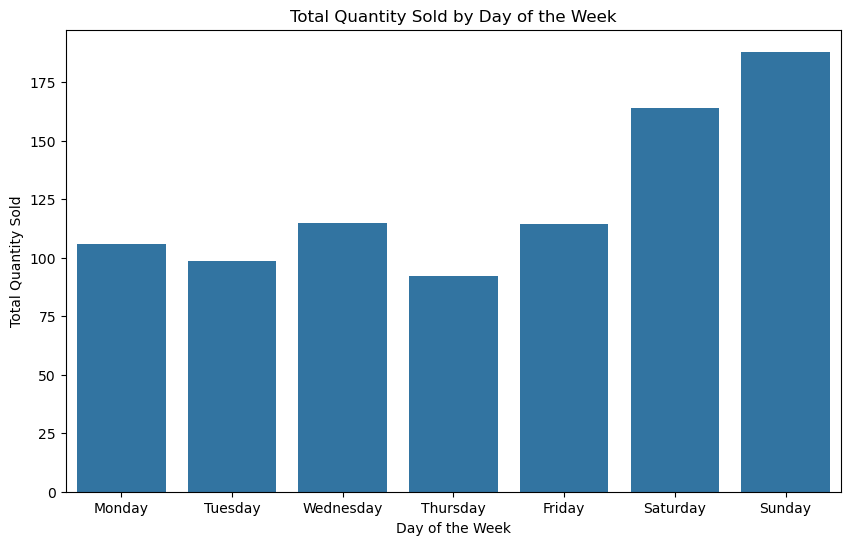

   created_on       product_name  Actual_Quantity  Predicted_Quantity  \
0  2025-04-24          Dry Jamun             1.00                1.11   
1  2025-04-24        Gulab Jamun             0.08                0.13   
2  2025-04-24        Jamun Balls             3.88                4.26   
3  2025-04-24         Kala Jamun             0.25                0.59   
4  2025-04-24  Rose Paneer Jamun             1.85                1.77   
5  2025-04-25          Dry Jamun             1.14                1.28   
6  2025-04-25        Gulab Jamun             0.08                0.09   
7  2025-04-25        Jamun Balls             5.10                5.53   
8  2025-04-25         Kala Jamun             0.50                0.56   
9  2025-04-25  Rose Paneer Jamun             2.95                2.10   
10 2025-04-26          Dry Jamun             2.17                1.55   
11 2025-04-26        Gulab Jamun             0.20                0.24   
12 2025-04-26        Jamun Balls             6.02  

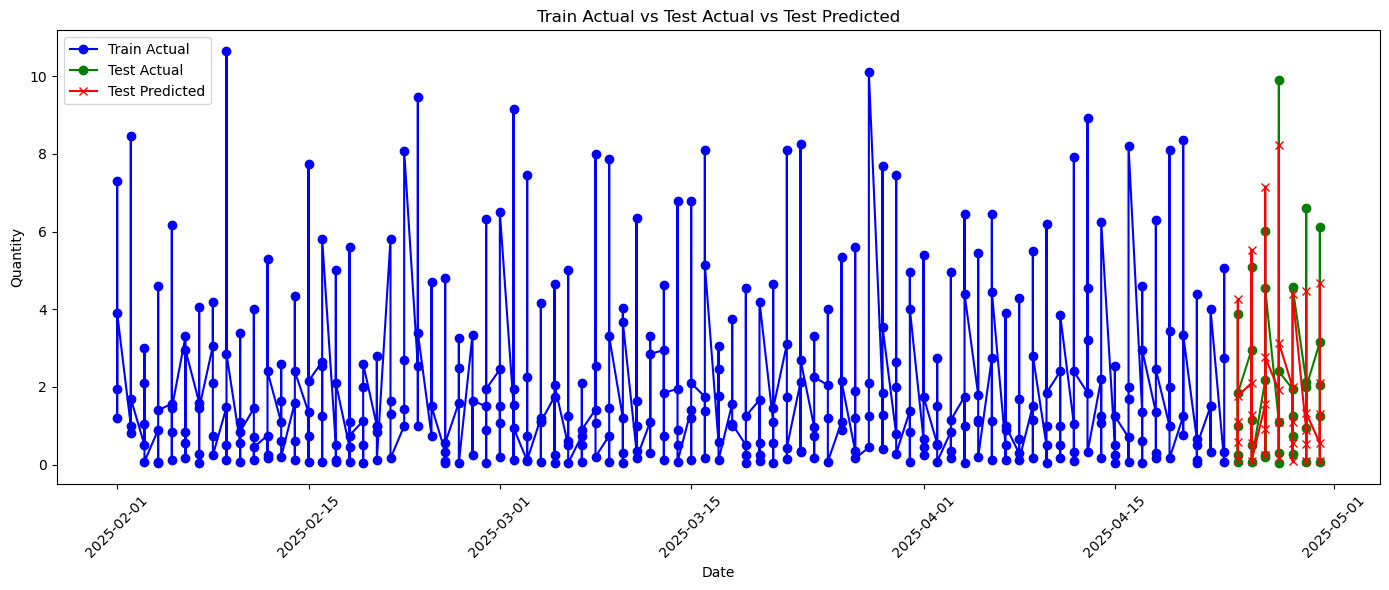

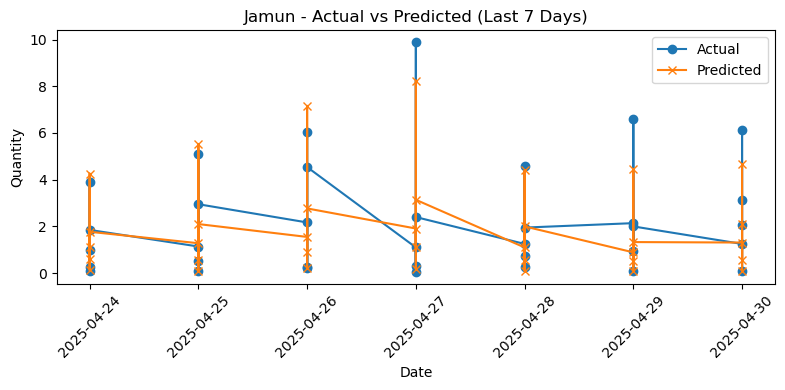

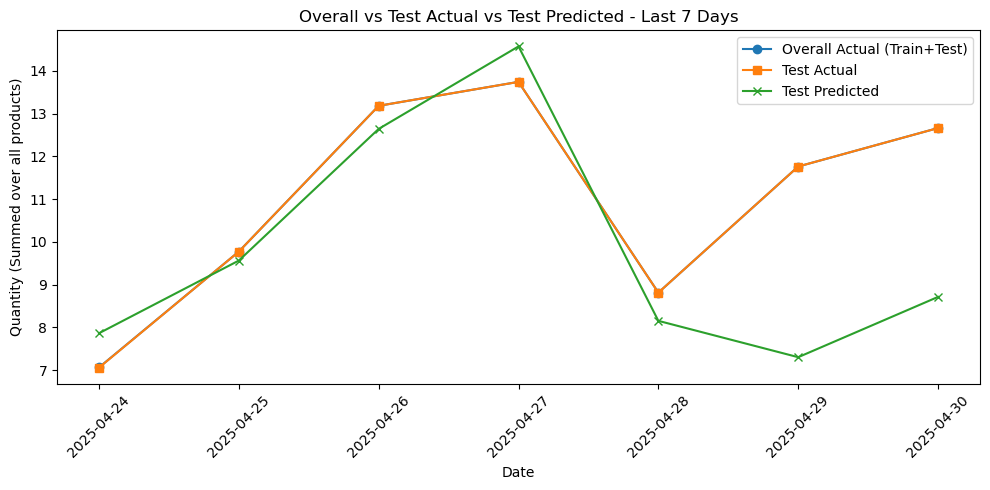

In [3]:
import pandas as pd
!pip install xgboost
# File paths (change these to your actual file paths)
file1 = r"G:\ganga abc\Input\Pudur Feb 2025.xlsx"
file2 = r"G:\ganga abc\Input\Pudur March 2025.xlsx"
file3 = r"G:\ganga abc\Input\Pudur April 2025.xlsx"

# Read all three files
df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)
df3 = pd.read_excel(file3)

combined_df = pd.concat([df1, df2, df3], ignore_index=True)
mdf = pd.read_excel(r"G:\ganga abc\Input\Tamil_Calendar_with_Muhurtham_2025_updated.xlsx")
combined_df['created_on'] = pd.to_datetime(combined_df['created_on'], dayfirst=True, errors='coerce').dt.date
mdf['Start Date'] = pd.to_datetime(mdf['Start Date'], dayfirst=True, errors='coerce').dt.date
combined_df = combined_df.merge(
    mdf[['Start Date', 'Muhurtham Day']],
    left_on='created_on',
    right_on='Start Date',
    how='left'
).drop(columns=['Start Date'])
combined_df = combined_df[combined_df['category_name'] == 'Bengali Sweets']
combined_df = combined_df[combined_df['product_name'].str.contains('jamun', case=False, na=False)]
combined_df = combined_df[~combined_df['product_name'].str.contains('tin', case=False, na=False)]
combined_df.loc[combined_df['product_name'].str.contains(r'\(250gm\)', na=False), 'quantity'] *= 0.25
combined_df.loc[combined_df['product_name'].str.contains(r'\(500gm\)', na=False), 'quantity'] *= 0.5
combined_df.loc[combined_df['product_name'].str.contains(r'\(1Nos\)', na=False), 'quantity'] *= 0.04
combined_df['product_name'] = combined_df['product_name'].str.replace(r'\(1Nos\)|\(250gm\)|\(500gm\)|\(1kg\)', '', regex=True)
combined_df['product_name'] = combined_df['product_name'].str.strip()
# Replace blanks or NaNs with "no"
combined_df['Muhurtham Day'] = combined_df['Muhurtham Day'].replace('', 'no')  # Replace empty strings
combined_df['Muhurtham Day'] = combined_df['Muhurtham Day'].fillna('no')       # Replace NaNs

# Standardize capitalization (optional)
combined_df['Muhurtham Day'] = combined_df['Muhurtham Day'].str.lower()
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 3. Convert 'created_on' to datetime
combined_df['created_on'] = pd.to_datetime(combined_df['created_on'])

# 4. Add a new column for day of the week
combined_df['DayOfWeek'] = combined_df['created_on'].dt.day_name()

# 5. Sales by Muhurtham Day vs Non-Muhurtham Day
plt.figure(figsize=(8,6))
ax = sns.barplot(data=combined_df, x='Muhurtham Day', y='quantity', estimator=np.mean, ci=None)
plt.title('Average Quantity Sold: Muhurtham Day vs Non-Muhurtham Day')
plt.ylabel('Average Quantity Sold')

# Add exact numbers on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

# 7. Sales by Day of the Week
plt.figure(figsize=(10,6))
sns.barplot(data=combined_df, x='DayOfWeek', y='quantity', estimator=sum, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ci=None)
plt.title('Total Quantity Sold by Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Day of the Week')
plt.show()


import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# ---- Preprocessing ----
combined_df['created_on'] = pd.to_datetime(combined_df['created_on'])

# Group by date and product, sum over quantity
grouped = combined_df.groupby(['created_on', 'product_name'], as_index=False)['quantity'].sum()

# Feature engineering
grouped['dayofweek'] = grouped['created_on'].dt.dayofweek

# ---- Sort and split ----
grouped = grouped.sort_values('created_on')
last_date = grouped['created_on'].max()
test_start = last_date - pd.Timedelta(days=6)

train_df = grouped[grouped['created_on'] < test_start].copy()
test_df = grouped[grouped['created_on'] >= test_start].copy()

# ---- Encode product_name ----
le = LabelEncoder()
train_df['product_enc'] = le.fit_transform(train_df['product_name'])
test_df['product_enc'] = le.transform(test_df['product_name'])

# ---- Features and targets ----
features = ['product_enc', 'dayofweek']
X_train = train_df[features]
y_train = train_df['quantity']
X_test = test_df[features]
y_test = test_df['quantity']

# ---- Modeling ----
model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# ---- Prediction ----
preds = model.predict(X_test)
preds_2dec = np.round(preds, 2)

# ---- Results ----
results = test_df.copy()
results['Predicted_Quantity'] = preds_2dec
results['Actual_Quantity'] = y_test.values

# ---- Group duplicates by summing ----
final_results = (
    results
    .groupby(['created_on', 'product_name'], as_index=False)
    .agg({
        'Actual_Quantity': 'sum',
        'Predicted_Quantity': 'sum'
    })
)
final_results['Difference'] = final_results['Predicted_Quantity'] - final_results['Actual_Quantity']

# ---- Standardize decimals to 2 places ----
for col in ['Actual_Quantity', 'Predicted_Quantity', 'Difference']:
    final_results[col] = final_results[col].round(2)

# ---- Show results ----
print(final_results[['created_on', 'product_name', 'Actual_Quantity', 'Predicted_Quantity', 'Difference']])

# ---- Metrics ----
mae = mean_absolute_error(y_test, preds_2dec)
rmse = np.sqrt(mean_squared_error(y_test, preds_2dec))
r2 = r2_score(y_test, preds_2dec)
accuracy_percent = r2 * 100

print('MAE:', mae)
print('RMSE:', rmse)
print(f'Accuracy (R2 score): {accuracy_percent:.2f}%')

# ---- Save to Excel ----
final_results[['created_on', 'product_name', 'Actual_Quantity', 'Predicted_Quantity', 'Difference']].to_excel(
    r"G:\ganga abc\Output\Jamun predicted_vs_actuals.xlsx", index=False
)
# Replace all values in 'product_name' with 'Jamun'
final_results['product_name'] = 'Jamun'

# Group by 'created_on' and sum the quantities
result = (
    final_results.groupby(['created_on', 'product_name'], as_index=False)[['Actual_Quantity', 'Predicted_Quantity']].sum()
)

# Calculate the difference
result['Difference'] = result['Actual_Quantity'] - result['Predicted_Quantity']

result.to_excel(
    r"G:\ganga abc\Output\Jamun Overall Jamun sales predicted.xlsx", index=False
)
import matplotlib.pyplot as plt

# --- Prepare data for plotting ---

# Train data
train_dates = train_df['created_on']
train_actual = train_df['quantity']

# Test data
test_dates = test_df['created_on']
test_actual = test_df['quantity']
test_predicted = preds_2dec

# --- Plot ---
plt.figure(figsize=(14, 6))

plt.plot(train_dates, train_actual, label='Train Actual', color='blue', marker='o')
plt.plot(test_dates, test_actual, label='Test Actual', color='green', marker='o')
plt.plot(test_dates, test_predicted, label='Test Predicted', color='red', marker='x')

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Train Actual vs Test Actual vs Test Predicted')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt

# Ensure 'created_on' is datetime
final_results['created_on'] = pd.to_datetime(final_results['created_on'])

# Get last 7 unique dates
last_7_dates = final_results['created_on'].sort_values().unique()[-7:]

# Filter for last 7 days
plot_df = final_results[final_results['created_on'].isin(last_7_dates)].copy()
plot_df = plot_df.sort_values(['created_on', 'product_name'])

# Plot individual graphs for each product
for product in plot_df['product_name'].unique():
    prod_data = plot_df[plot_df['product_name'] == product]
    plt.figure(figsize=(8, 4))
    plt.plot(prod_data['created_on'], prod_data['Actual_Quantity'], label="Actual", marker='o')
    plt.plot(prod_data['created_on'], prod_data['Predicted_Quantity'], label="Predicted", marker='x')
    plt.title(f"{product} - Actual vs Predicted (Last 7 Days)")
    plt.xlabel("Date")
    plt.ylabel("Quantity")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
import matplotlib.pyplot as plt

# Ensure 'created_on' is datetime
final_results['created_on'] = pd.to_datetime(final_results['created_on'])

# LAST 7 DAYS
last_7_dates = final_results['created_on'].sort_values().unique()[-7:]

# --- 1. OVERALL (train + test) actual per day ---
overall_actual = (
    final_results[final_results['created_on'].isin(last_7_dates)]
    .groupby('created_on')['Actual_Quantity'].sum()
    .reset_index()
    .rename(columns={'Actual_Quantity': 'Overall_Actual'})
)

# --- 2. TEST actual per day ---
test_actual = (
    test_df[test_df['created_on'].isin(last_7_dates)]
    .groupby('created_on')['quantity'].sum()
    .reset_index()
    .rename(columns={'quantity': 'Test_Actual'})
)

# --- 3. TEST predicted per day ---
test_predicted = (
    results[results['created_on'].isin(last_7_dates)]
    .groupby('created_on')['Predicted_Quantity'].sum()
    .reset_index()
    .rename(columns={'Predicted_Quantity': 'Test_Predicted'})
)

# Merge for plotting
plot_df = overall_actual.merge(test_actual, on='created_on', how='left').merge(test_predicted, on='created_on', how='left')

plt.figure(figsize=(10, 5))
plt.plot(plot_df['created_on'], plot_df['Overall_Actual'], label='Overall Actual (Train+Test)', marker='o')
plt.plot(plot_df['created_on'], plot_df['Test_Actual'], label='Test Actual', marker='s')
plt.plot(plot_df['created_on'], plot_df['Test_Predicted'], label='Test Predicted', marker='x')
plt.xlabel("Date")
plt.ylabel("Quantity (Summed over all products)")
plt.title("Overall vs Test Actual vs Test Predicted - Last 7 Days")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()